In [1]:
!pip uninstall --yes gdown # After running this line, restart Colab runtime.
!pip install gdown -U --no-cache-dir

Found existing installation: gdown 4.6.6
Uninstalling gdown-4.6.6:
  Successfully uninstalled gdown-4.6.6


In [2]:
import gdown

url = 'https://drive.google.com/drive/folders/1Z7R1g3CJjXe8NVXN7FLzyW6Mx5Vbrp-s?usp=sharing'

gdown.download_folder(url)

Retrieving folder list


Processing file 1Negfad4d2T2qItcuTELTvCk3T8E6gbgL Dig-MNIST.csv
Processing file 1ga4Xk7DJO_kuL6rTyPTEvTA6VnYsvMmp test.csv
Processing file 1JYE626LB8XETG-1So8P2Hw65HaFMNVAI train.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1Negfad4d2T2qItcuTELTvCk3T8E6gbgL
To: /content/kanada/Dig-MNIST.csv
100%|██████████| 18.4M/18.4M [00:00<00:00, 50.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ga4Xk7DJO_kuL6rTyPTEvTA6VnYsvMmp
To: /content/kanada/test.csv
100%|██████████| 8.67M/8.67M [00:00<00:00, 40.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYE626LB8XETG-1So8P2Hw65HaFMNVAI
To: /content/kanada/train.csv
100%|██████████| 105M/105M [00:01<00:00, 53.0MB/s] 
Download completed


['/content/kanada/Dig-MNIST.csv',
 '/content/kanada/test.csv',
 '/content/kanada/train.csv']

In [3]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
train_df=pd.read_csv("/content/kanada/train.csv")
test_df=pd.read_csv("/content/kanada/test.csv")
valid_df=pd.read_csv("/content/kanada/Dig-MNIST.csv")

In [5]:
names=train_df.drop('label',axis=1).columns
names

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [6]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
pca_train=PCA(n_components=4,whiten=True)
pca_train.fit(train_df.drop('label',axis=1))

PCA(n_components=4, whiten=True)

In [8]:
transformed=pca_train.transform(train_df.drop('label',axis=1))
pd_transform=pd.DataFrame(transformed)
pd_transform

,0,1,2,3
0,1.369109,-0.722034,0.089588,-1.080333
1,0.677439,-0.264815,0.161040,-1.839562
2,-0.965913,1.754147,1.314673,-0.511155
3,-0.780289,0.273290,-1.261023,-0.028387
4,-0.217992,0.009665,-1.566383,0.420782
...,...,...,...,...
59995,-0.478651,1.043591,2.247553,0.485694
59996,-0.934635,0.123976,0.385478,-0.689468
59997,-1.290992,0.016142,1.426918,-1.177581
59998,1.751402,-0.287174,0.898949,1.543996


In [9]:
original_transform=pca_train.inverse_transform(transformed)
pd_original=pd.DataFrame(original_transform)
pd_original

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-2.966264e-14,5.018199e-14,2.792088e-14,6.340925e-16,-1.201470e-15,0.003758,0.013374,-0.002052,0.002150,0.027849,...,0.030030,0.027095,0.018094,0.033976,0.026800,0.001122,0.007822,0.0,-0.000361,0.0
1,-3.649499e-14,9.246481e-14,4.451870e-14,1.053181e-15,-2.008106e-15,0.016198,0.053110,0.029250,0.081596,0.149959,...,0.032635,0.019584,0.008049,0.018940,0.025401,-0.000100,0.008839,0.0,0.002521,0.0
2,-2.043450e-14,6.489688e-14,2.110202e-14,5.173481e-16,-6.499335e-16,0.037664,0.126656,0.157050,0.338803,0.513578,...,0.016094,0.023861,0.019500,0.033266,0.019742,0.001766,0.001731,0.0,0.005289,0.0
3,3.997756e-14,-2.212698e-14,-1.449512e-14,-2.638912e-16,1.409851e-16,0.007837,0.014660,0.009458,0.030022,0.023603,...,0.011903,-0.005064,-0.006539,-0.011705,-0.003247,-0.000320,0.003778,0.0,0.007349,0.0
4,5.161436e-14,-5.232678e-14,-2.727165e-14,-5.679627e-16,6.514301e-16,-0.001857,-0.019617,-0.022941,-0.043185,-0.093193,...,0.011089,-0.001845,-0.001682,-0.004647,-0.003165,0.000301,0.003314,0.0,0.005821,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-4.234887e-14,2.903393e-14,1.112499e-14,1.887123e-16,2.760453e-16,0.028875,0.111399,0.164308,0.324048,0.509000,...,0.010657,0.040166,0.038431,0.062780,0.025779,0.003888,0.000023,0.0,0.000304,0.0
59996,-1.939179e-14,4.249676e-14,1.948710e-14,4.554576e-16,-7.829947e-16,0.021602,0.076717,0.078694,0.167257,0.268606,...,0.016259,0.009065,0.003403,0.007247,0.010308,0.000199,0.004916,0.0,0.005006,0.0
59997,-5.808596e-14,8.664102e-14,4.256664e-14,9.484165e-16,-1.442495e-15,0.032090,0.122723,0.127883,0.265614,0.442489,...,0.018240,0.014997,0.006521,0.014048,0.016987,0.000227,0.005762,0.0,0.004168,0.0
59998,-7.211277e-15,-5.991890e-14,-2.382252e-14,-6.427616e-16,1.530609e-15,-0.007675,-0.018256,0.025434,0.020369,0.035303,...,0.012639,0.048616,0.050200,0.080377,0.027191,0.005304,0.000447,0.0,-0.005088,0.0


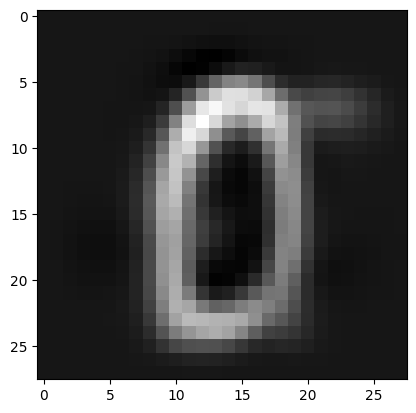

In [10]:
plt.imshow(pd_original[0:1].to_numpy().reshape(28,28),cmap="gray")

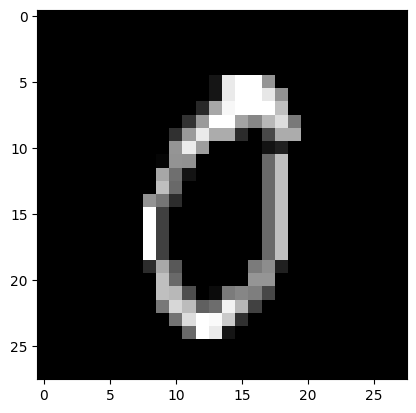

In [11]:
plt.imshow(train_df.drop('label',axis=1)[0:1].to_numpy().reshape(28,28),cmap="gray")

In [12]:
import random

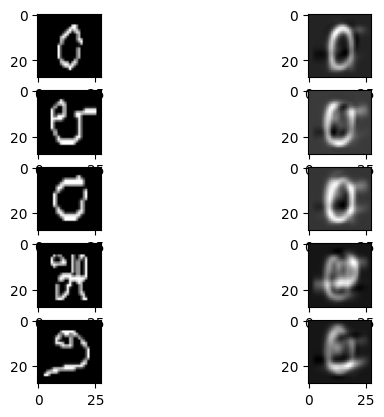

In [13]:
n = 5
fig, ax = plt.subplots(n,2)
for i in range(n):
   x = random.randint(0, 783)
   ax[i, 0].imshow(train_df.drop('label',axis=1)[x : x+1].to_numpy().reshape(28, 28), cmap= 'gray')
   ax[i, 1].imshow(pd_original[x : x+1].to_numpy().reshape(28, 28), cmap= 'gray')
plt.show()

#Autoencoders

In [14]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torch.optim as optim
from tqdm import tqdm

In [42]:
class KanadaMnist(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.pixels = self.data.iloc[:, 1:].values.astype(float)/255.0

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        pixels = self.pixels[idx]
        return torch.tensor(pixels, dtype=torch.float32)

In [46]:
train_data = KanadaMnist("/content/kanada/train.csv")
valid_data = KanadaMnist("/content/kanada/Dig-MNIST.csv")

In [75]:
class AutoencoderR(nn.Module):
    def __init__(self, k):
        super(AutoencoderR, self).__init__()
        self.encoder_layer1 = nn.Linear(784, 512)
        self.relu = nn.ReLU()
        self.encoder_layer2 = nn.Linear(512, 256)
        self.encoder_layer3 = nn.Linear(256, k)

        self.decoder_layer1 = nn.Linear(k, 256)
        self.decoder_layer2 = nn.Linear(256, 512)
        self.decoder_layer3 = nn.Linear(512, 784)

    def forward(self, x):
        # Encoding
        encoded = self.encoder_layer1(x)
        encoded = self.relu(encoded)
        encoded = self.encoder_layer2(encoded)
        encoded = self.relu(encoded)
        encoded = self.encoder_layer3(encoded)
        encoded = self.relu(encoded)

        #Decoding
        decoded = self.decoder_layer1(encoded)
        decoded = self.relu(decoded)
        decoded = self.decoder_layer2(decoded)
        decoded = self.relu(decoded)
        decoded = self.decoder_layer3(decoded)
        decoded = self.relu(decoded)

        return decoded

In [77]:
device=("cuda" if torch.cuda.is_available() else "cpu")
device

'cuda'

In [76]:
k=4
autoencoderr=AutoencoderR(k)

In [78]:
autoencoderr.to(device)

AutoencoderR(
  (encoder_layer1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (encoder_layer2): Linear(in_features=512, out_features=256, bias=True)
  (encoder_layer3): Linear(in_features=256, out_features=4, bias=True)
  (decoder_layer1): Linear(in_features=4, out_features=256, bias=True)
  (decoder_layer2): Linear(in_features=256, out_features=512, bias=True)
  (decoder_layer3): Linear(in_features=512, out_features=784, bias=True)
)

In [79]:
batch_size=64
train = DataLoader(train_data,batch_size=batch_size,shuffle=True)
valid = DataLoader(valid_data,batch_size=batch_size,shuffle=True)

In [80]:
learning_rate=0.001
num_epochs=20

In [81]:
loss_fn=nn.MSELoss()
optimizer=optim.AdamW(autoencoderr.parameters(),lr=learning_rate)

In [84]:
num_batches = len(train_df) // batch_size

for epoch in range(num_epochs):
    total_loss = 0.0
    progress_bar = tqdm(range(num_batches), desc=f"Epoch [{epoch+1}/{num_epochs}]")

    autoencoderr.train()
    for batch_idx in progress_bar:
        batch_start = batch_idx * batch_size
        batch_end = (batch_idx + 1) * batch_size

        batch_inputs = train_data[batch_start:batch_end].to(device)
        optimizer.zero_grad()

        batch_outputs = autoencoderr(batch_inputs)
        reconstruction_loss = loss_fn(batch_outputs, batch_inputs)
        reconstruction_loss.backward()
        optimizer.step()

        total_loss += reconstruction_loss.item() * batch_inputs.size(0)
        average_loss = total_loss / (batch_idx + 1) * batch_size

        progress_bar.set_postfix({"Train Loss": f"{average_loss:.4f}"})

    progress_bar.close()
    autoencoderr.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for valid_batch in valid_data:
            valid_inputs = valid_batch.to(device)
            valid_outputs = autoencoderr(valid_inputs)
            valid_loss += loss_fn(valid_outputs, valid_inputs).item() * valid_inputs.size(0)

    average_valid_loss = valid_loss / len(valid_data)
    print(f"Epoch [{epoch+1}/{num_epochs}], Valid Loss: {average_valid_loss:.4f}")

Epoch [1/20]: 100%|██████████| 937/937 [00:05<00:00, 171.38it/s, Train Loss=139.9362]


Epoch [1/20], Valid Loss: 52.5032


Epoch [2/20]: 100%|██████████| 937/937 [00:05<00:00, 169.64it/s, Train Loss=134.9212]


Epoch [2/20], Valid Loss: 51.8729


Epoch [3/20]: 100%|██████████| 937/937 [00:05<00:00, 177.51it/s, Train Loss=132.1047]


Epoch [3/20], Valid Loss: 51.4463


Epoch [4/20]: 100%|██████████| 937/937 [00:05<00:00, 175.80it/s, Train Loss=129.9880]


Epoch [4/20], Valid Loss: 51.4255


Epoch [5/20]: 100%|██████████| 937/937 [00:05<00:00, 161.37it/s, Train Loss=128.9085]


Epoch [5/20], Valid Loss: 50.9174


Epoch [6/20]: 100%|██████████| 937/937 [00:05<00:00, 162.33it/s, Train Loss=127.9009]


Epoch [6/20], Valid Loss: 50.8911


Epoch [7/20]: 100%|██████████| 937/937 [00:05<00:00, 169.30it/s, Train Loss=127.1175]


Epoch [7/20], Valid Loss: 51.0348


Epoch [8/20]: 100%|██████████| 937/937 [00:05<00:00, 174.08it/s, Train Loss=126.3939]


Epoch [8/20], Valid Loss: 50.6765


Epoch [9/20]: 100%|██████████| 937/937 [00:05<00:00, 172.45it/s, Train Loss=125.8107]


Epoch [9/20], Valid Loss: 50.7608


Epoch [10/20]: 100%|██████████| 937/937 [00:05<00:00, 172.92it/s, Train Loss=125.2374]


Epoch [10/20], Valid Loss: 50.7651


Epoch [11/20]: 100%|██████████| 937/937 [00:05<00:00, 169.79it/s, Train Loss=124.6382]


Epoch [11/20], Valid Loss: 50.7908


Epoch [12/20]: 100%|██████████| 937/937 [00:05<00:00, 165.63it/s, Train Loss=124.0784]


Epoch [12/20], Valid Loss: 50.8038


Epoch [13/20]: 100%|██████████| 937/937 [00:05<00:00, 170.65it/s, Train Loss=123.6575]


Epoch [13/20], Valid Loss: 50.8581


Epoch [14/20]: 100%|██████████| 937/937 [00:05<00:00, 169.27it/s, Train Loss=123.4274]


Epoch [14/20], Valid Loss: 51.0551


Epoch [15/20]: 100%|██████████| 937/937 [00:05<00:00, 174.97it/s, Train Loss=123.1469]


Epoch [15/20], Valid Loss: 51.0042


Epoch [16/20]: 100%|██████████| 937/937 [00:05<00:00, 168.00it/s, Train Loss=122.9134]


Epoch [16/20], Valid Loss: 50.7526


Epoch [17/20]: 100%|██████████| 937/937 [00:05<00:00, 171.67it/s, Train Loss=122.6696]


Epoch [17/20], Valid Loss: 50.9929


Epoch [18/20]: 100%|██████████| 937/937 [00:05<00:00, 169.45it/s, Train Loss=122.3169]


Epoch [18/20], Valid Loss: 51.0159


Epoch [19/20]: 100%|██████████| 937/937 [00:05<00:00, 164.20it/s, Train Loss=122.0855]


Epoch [19/20], Valid Loss: 51.0327


Epoch [20/20]: 100%|██████████| 937/937 [00:05<00:00, 170.73it/s, Train Loss=121.7877]


Epoch [20/20], Valid Loss: 51.2655


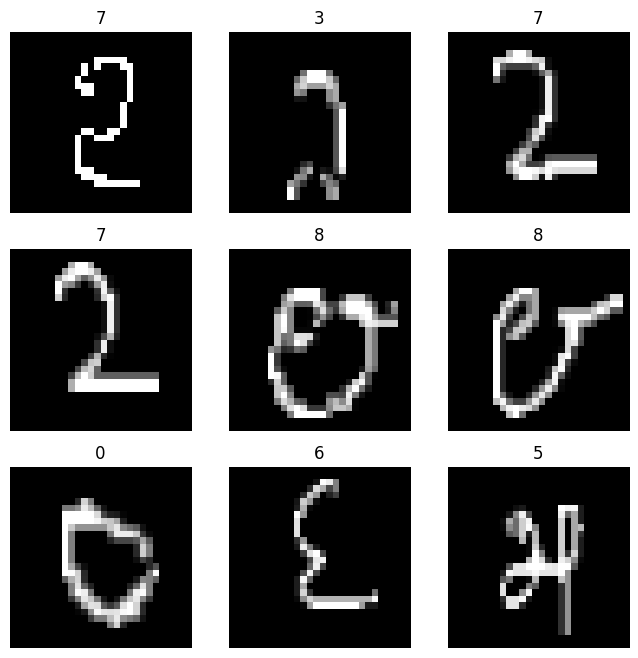

In [70]:
import matplotlib.pyplot as plt
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize = (8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):

    # taking a random index in the range 0 to length of training_data
    sample_idx = torch.randint(len(train_df), size = (1,)).item()

    # training_data[i] returns image and the label of the image.
    labels = train_df.iloc[sample_idx,0]
    img = np.array(train_df.drop("label", axis = 1).iloc[sample_idx].values).reshape((28,28))

    # Visualizing the images
    figure.add_subplot(rows, cols, i)
    plt.title(labels)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

In [85]:
autoencoderr.eval()

pred_df_relu = pd.DataFrame()

with torch.no_grad():
    for pred_batch in valid_data:
        pred_inputs = pred_batch.to(device)
        pred_outputs = autoencoderr(pred_inputs)
        pred_outputs = pred_outputs.cpu().numpy().reshape(-1, 784)  # Reshape to have 784 columns
        pred_df_relu = pred_df_relu.append(pd.DataFrame(pred_outputs), ignore_index=True)

<ipython-input-85-7ce54e24b786>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df_relu = pred_df_relu.append(pd.DataFrame(pred_outputs), ignore_index=True)


In [86]:
pred_df_relu.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


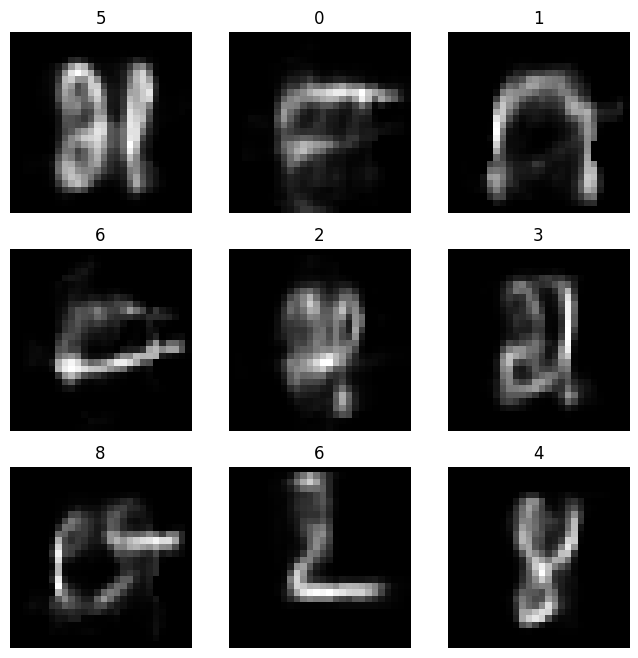

In [87]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    # Ensure the sample_idx is within the bounds of pred_df length
    sample_idx = np.random.randint(len(pred_df_relu))

    # pred_df[i] returns image and the label of the image.
    labels = valid_df.iloc[sample_idx, 0]
    img = np.array(pred_df.iloc[sample_idx].values).reshape((28, 28))

    # Visualizing the images
    figure.add_subplot(rows, cols, i)
    plt.title(labels)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()